In [1]:
#Loading all required libraries 
%pylab inline
import cv2
import numpy as np 
import pandas as pd
import pytesseract
import matplotlib.pyplot as plt
import statistics

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Setting matplot figure size
plt.rcParams['figure.figsize'] = [15, 8]

In [3]:
# loading image form directory
#img = cv2.imread('image2.jpg',0)

In [4]:
img = cv2.imread('aa.jpg',0)

In [5]:
img.shape

(1081, 1040)

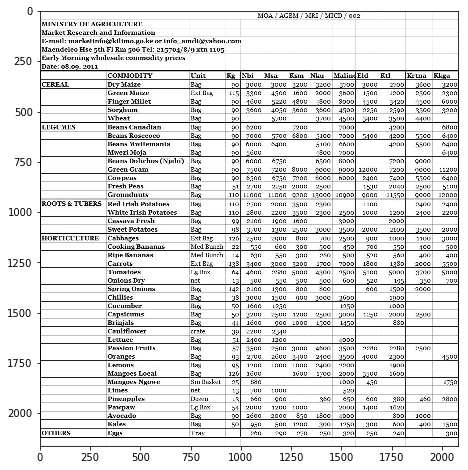

In [6]:
# showing image
imgplot = plt.imshow(cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

In [7]:
# for adding border to an image
img1= cv2.copyMakeBorder(img,50,50,50,50,cv2.BORDER_CONSTANT,value=[255,255])

In [8]:
img123 = img1.copy()

In [9]:
# Thresholding the image
(thresh, th3) = cv2.threshold(img1, 128, 255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)

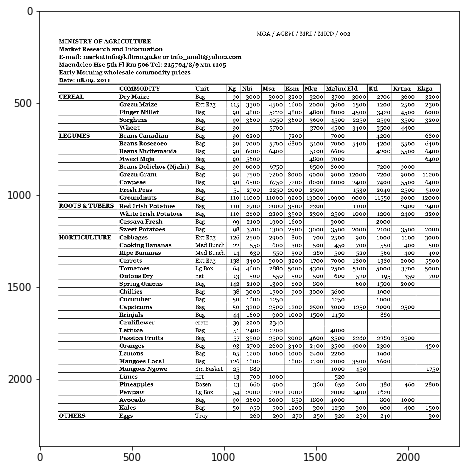

In [10]:
imgplot = plt.imshow(cv2.resize(th3, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

In [11]:
# to flip image pixel values
th3 = 255-th3

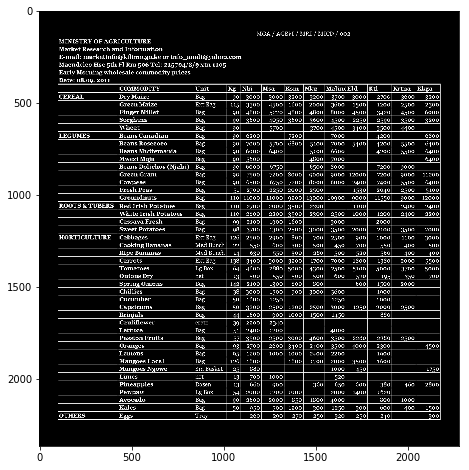

In [12]:
imgplot = plt.imshow(cv2.resize(th3, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

In [13]:
# initialize kernels for table boundaries detections
if(th3.shape[0]<1000):
    ver = np.array([[1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1]])
    hor = np.array([[1,1,1,1,1,1]])
    
else:
    ver = np.array([[1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1]])
    hor = np.array([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

In [14]:
# to detect vertical lines of table borders
img_temp1 = cv2.erode(th3, ver, iterations=3)
verticle_lines_img = cv2.dilate(img_temp1, ver, iterations=3)

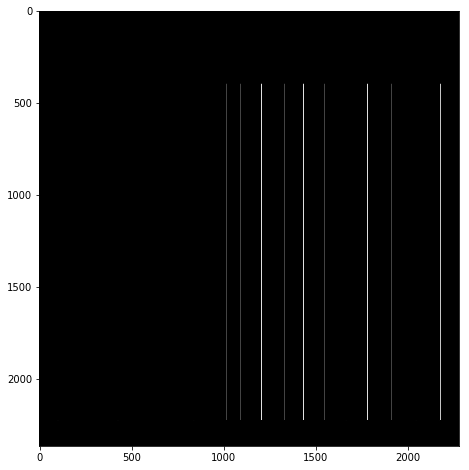

In [15]:
imgplot = plt.imshow(cv2.resize(verticle_lines_img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

In [16]:
# to detect horizontal lines of table borders
img_hor = cv2.erode(th3, hor, iterations=3)
hor_lines_img = cv2.dilate(img_hor, hor, iterations=4)

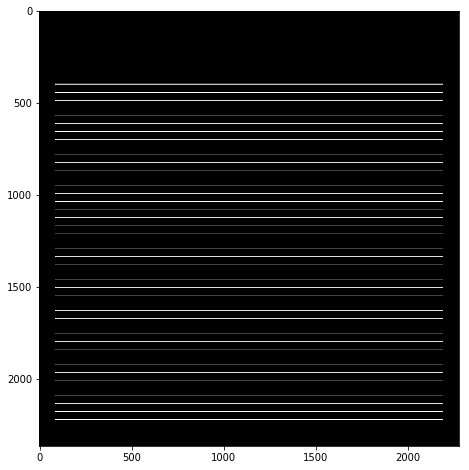

In [17]:
imgplot = plt.imshow(cv2.resize(hor_lines_img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

In [18]:
# adding horizontal and vertical lines
hor_ver = cv2.add(hor_lines_img,verticle_lines_img)

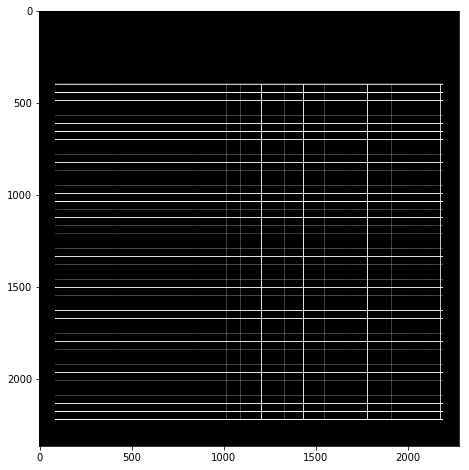

In [19]:
imgplot = plt.imshow(cv2.resize(hor_ver, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

In [20]:
hor_ver = 255-hor_ver

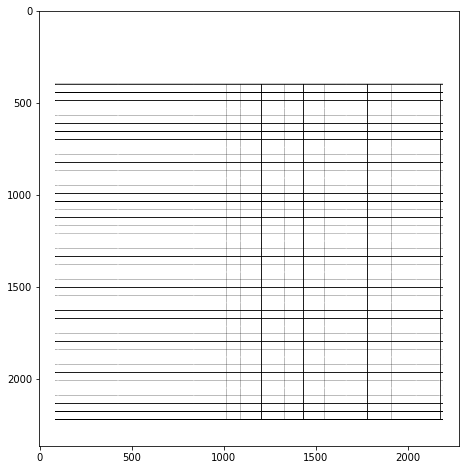

In [21]:
imgplot = plt.imshow(cv2.resize(hor_ver, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

In [22]:
# subtracting table borders from image
temp = cv2.subtract(th3,hor_ver)

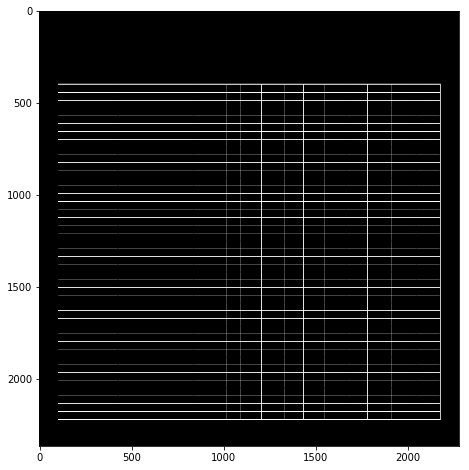

In [23]:
imgplot = plt.imshow(cv2.resize(temp, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

In [24]:
temp = 255-temp

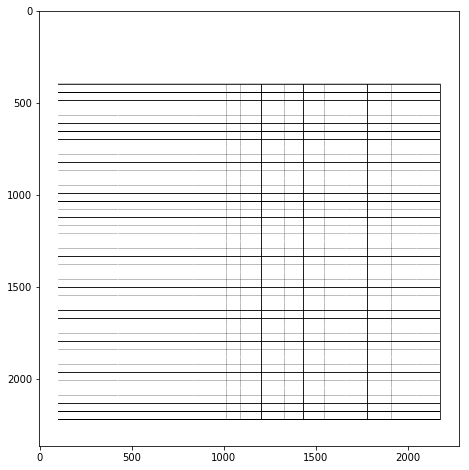

In [25]:
imgplot = plt.imshow(cv2.resize(temp, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

In [26]:
#Doing xor operation for erasing table boundaries
tt = cv2.bitwise_xor(img1,temp)

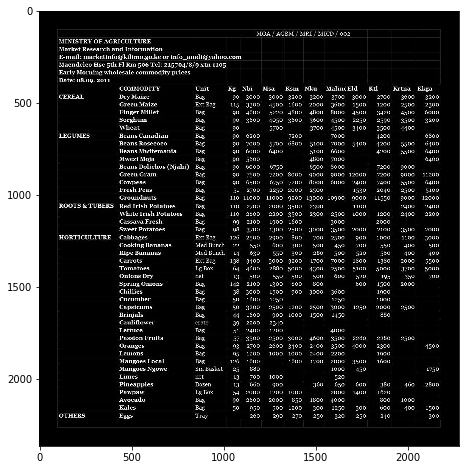

In [27]:
imgplot = plt.imshow(cv2.resize(tt, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

In [28]:
iii = cv2.bitwise_not(tt)

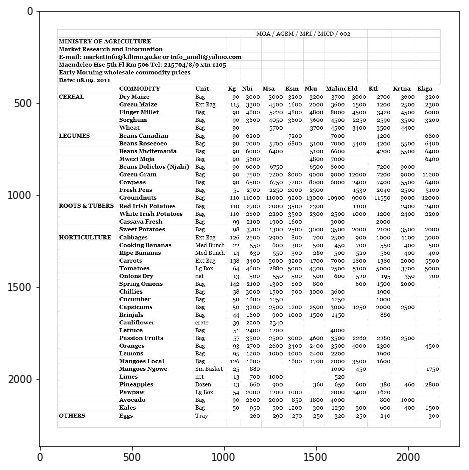

In [29]:
imgplot = plt.imshow(cv2.resize(iii, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

In [30]:
tt1=iii.copy()

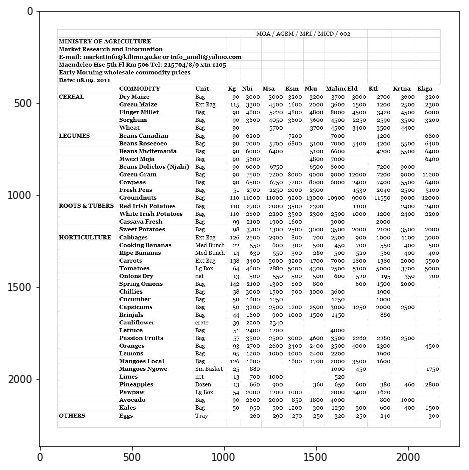

In [31]:
imgplot = plt.imshow(cv2.resize(tt1, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

In [32]:
#kernel initialization
ver1 = np.array([[1,1],
               [1,1],
               [1,1],
               [1,1],
               [1,1],
               [1,1],
               [1,1],
               [1,1],
               [1,1]])

In [33]:
hor1 = np.array([[1,1,1,1,1,1,1,1,1,1],
               [1,1,1,1,1,1,1,1,1,1]])

In [34]:
#morphological operation
temp1 = cv2.erode(tt1, ver1, iterations=1)
verticle_lines_img1 = cv2.dilate(temp1, ver1, iterations=1)

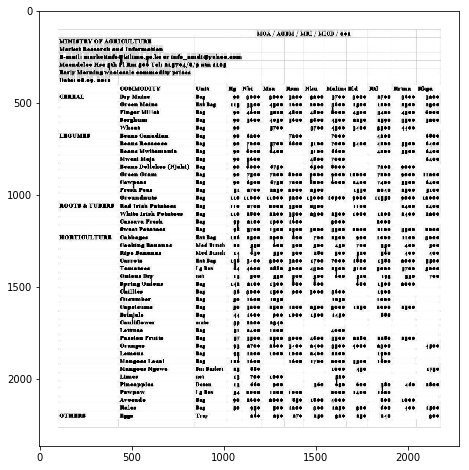

In [35]:
imgplot = plt.imshow(cv2.resize(verticle_lines_img1, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

In [36]:
temp12 = cv2.erode(tt1, hor1, iterations=1)
hor_lines_img2 = cv2.dilate(temp12, hor1, iterations=1)

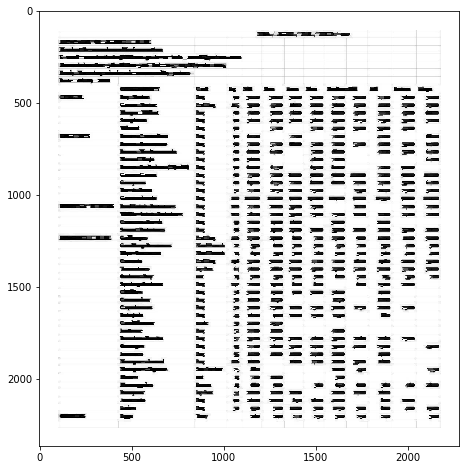

In [37]:
imgplot = plt.imshow(cv2.resize(hor_lines_img2, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

In [38]:
# doing or operation for detecting only text part and removing rest all
hor_ver = cv2.add(hor_lines_img2,verticle_lines_img1)

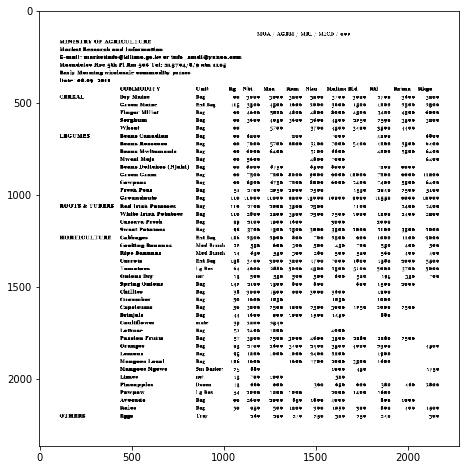

In [39]:
imgplot = plt.imshow(cv2.resize(hor_ver, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

In [40]:
dim1 = (hor_ver.shape[1],hor_ver.shape[0])

In [41]:
dim = (hor_ver.shape[1]*2,hor_ver.shape[0]*2)

In [42]:
# resizing image to its double size to increase the text size
resized = cv2.resize(hor_ver, dim, interpolation = cv2.INTER_AREA)

In [43]:
#bitwise not operation for fliping the pixel values so as to apply morphological operation such as dilation and erode
want = cv2.bitwise_not(resized)

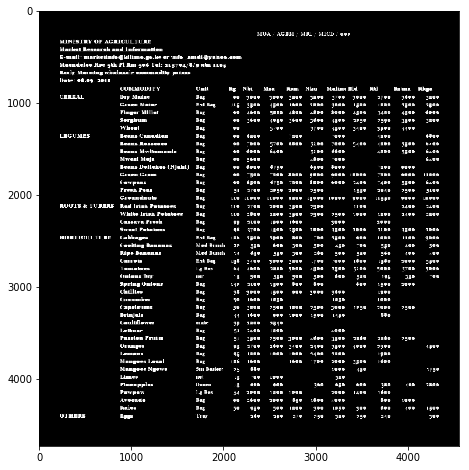

In [44]:
imgplot = plt.imshow(cv2.resize(want, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

In [45]:
if(want.shape[0]<1000):
    kernel1 = np.array([[1,1,1]])
    kernel2 = np.array([[1,1],
                        [1,1]])
    kernel3 = np.array([[1,0,1],[0,1,0],
                       [1,0,1]])
else:
    kernel1 = np.array([[1,1,1,1,1,1]])
    kernel2 = np.array([[1,1,1,1,1],
                        [1,1,1,1,1],
                        [1,1,1,1,1],
                        [1,1,1,1,1]])


In [46]:
tt1 = cv2.dilate(want,kernel1,iterations=4)

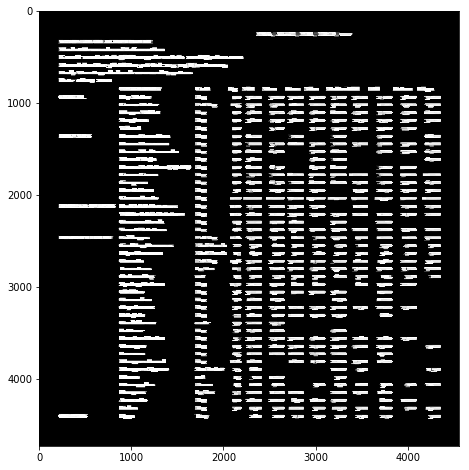

In [47]:
imgplot = plt.imshow(cv2.resize(tt1, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

In [48]:
# getting image back to its original size
resized1 = cv2.resize(tt1, dim1, interpolation = cv2.INTER_AREA)

In [49]:
# Find contours for image, which will detect all the boxes
im21, contours1, hierarchy1 = cv2.findContours(resized1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [50]:
#function to sort contours by its x-axis (top to bottom)
def sort_contours(cnts, method="left-to-right"):
	# initialize the reverse flag and sort index
	reverse = False
	i = 0
 
	# handle if we need to sort in reverse
	if method == "right-to-left" or method == "bottom-to-top":
		reverse = True
 
	# handle if we are sorting against the y-coordinate rather than
	# the x-coordinate of the bounding box
	if method == "top-to-bottom" or method == "bottom-to-top":
		i = 1
 
	# construct the list of bounding boxes and sort them from top to
	# bottom
	boundingBoxes = [cv2.boundingRect(c) for c in cnts]
	(cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
		key=lambda b:b[1][i], reverse=reverse))
 
	# return the list of sorted contours and bounding boxes
	return (cnts, boundingBoxes)

In [51]:
#sorting contours by calling fuction
(cnts, boundingBoxes) = sort_contours(contours1, method="top-to-bottom")

In [52]:
#storing value of all bouding box height
heightlist=[]
for i in range(len(boundingBoxes)):
    heightlist.append(boundingBoxes[i][3])

In [53]:
#sorting height values
heightlist.sort()

In [54]:
sportion = int(.5*len(heightlist))

In [55]:
eportion = int(0.05*len(heightlist))

In [56]:
#taking 50% to 95% values of heights and calculate their mean 
#this will neglect small bounding box which are basically noise 
try:
    medianheight = statistics.mean(heightlist[-sportion:-eportion])
except:
    medianheight = statistics.mean(heightlist[-sportion:-2])

In [57]:
#keeping bounding box which are having height more then 70% of the mean height and deleting all those value where 
# ratio of width to height is less then 0.9
box =[]
imag = iii.copy()
for i in range(len(cnts)):    
    cnt = cnts[i]
    x,y,w,h = cv2.boundingRect(cnt)
    if(h>=.7*medianheight and w/h > 0.9):
        image = cv2.rectangle(imag,(x+4,y-2),(x+w-5,y+h),(0,255,0),1)
        box.append([x,y,w,h])
    # to show image


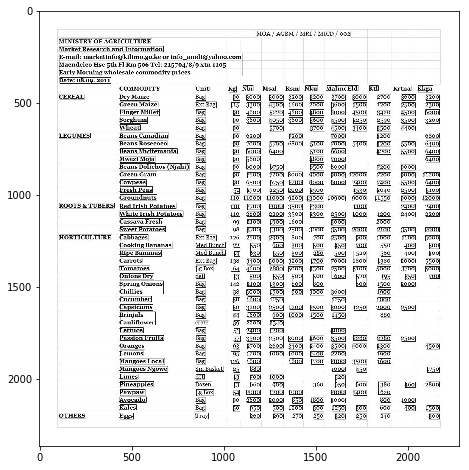

In [58]:
imgplot = plt.imshow(cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()

In [59]:
cv2.imwrite('imagegen.jpg',image)

True

In [60]:
#rearranging all the bounding boxes horizontal wise where every box fall on same horizontal line 
main=[]
j=0
l=[]
for i in range(len(box)):    
    if(i==0):
        l.append(box[i])
        last=box[i]
    else:
        if(box[i][1]<=last[1]+medianheight/2):
            l.append(box[i])
            last=box[i]
            if(i==len(box)-1):
                main.append(l)
        else:
#             print(l)            
            main.append(l)
            l=[]
            last = box[i]
            l.append(box[i])


In [61]:
#calculating maximum number of box in a particular row
maxsize=0
for i in range(len(main)):
    l=len(main[i])
    if(maxsize<=l):
        maxsize=l   

In [62]:
ylist=[]
for i in range(len(boundingBoxes)):
    ylist.append(boundingBoxes[i][0])

In [63]:
ymax = max(ylist)
ymin = min(ylist)

In [64]:
ymaxwidth=0
for i in range(len(boundingBoxes)):
    if(boundingBoxes[i][0]==ymax):
        ymaxwidth=boundingBoxes[i][2]

In [65]:
TotWidth = ymax+ymaxwidth-ymin

In [66]:
width = []
widthsum=0
for i in range(len(main)):
    for j in range(len(main[i])):
        widthsum = main[i][j][2]+widthsum
    
#     print(" Row ",i,"total width",widthsum)
    width.append(widthsum)
    widthsum=0
    

In [67]:
#removing all the lines which are not the part of the table
main1=[]
flag=0
for i in range(len(main)):
    if(i==0):
        if(width[i]>=(.8*TotWidth) and len(main[i])==1 or width[i]>=(.8*TotWidth) and width[i+1]>=(.8*TotWidth) or len(main[i])==1):
            flag = 1
    else:
        if(len(main[i])==1 and width[i-1]>=.8*TotWidth):
            flag=1
           
        elif(width[i]>=(.8*TotWidth) and len(main[i])==1):
             flag=1
             
        elif(len(main[i-1])==1 and len(main[i])==1 and (width[i]>=(.7*TotWidth) or width[i-1]>=(.8*TotWidth))):
            flag=1
    
        
    if(flag==1):
        pass
    else:
        main1.append(main[i])
    
    flag=0

In [68]:
maxsize1=0
for i in range(len(main1)):
    l=len(main1[i])
    if(maxsize1<=l):
        maxsize1=l  

In [69]:
#calculating the values of the mid points of the columns 
midpoint=[]
for i in range(len(main1)):
    if(len(main1[i])==maxsize1):
#         print(main1[i])
        for j in range(maxsize1):
            midpoint.append(int(main1[i][j][0]+main1[i][j][2]/2))
        break

In [70]:
midpoint=np.array(midpoint)
midpoint.sort()

In [71]:
final = [[]*maxsize1]*len(main1)

In [72]:
#sorting the boxes left to right
for i in range(len(main1)):
    for j in range(len(main1[i])):
        min_idx = j        
        for k in range(j+1,len(main1[i])):
            if(main1[i][min_idx][0]>main1[i][k][0]):
                min_idx = k
        
        main1[i][j], main1[i][min_idx] = main1[i][min_idx],main1[i][j]

In [73]:
#storing the boxes in their respective columns based upon their distances from mid points  
finallist = []
for i in range(len(main1)):
    lis=[ [] for k in range(maxsize1)]
    for j in range(len(main1[i])):
#         diff=np.zeros[maxsize]
        diff = abs(midpoint-(main1[i][j][0]+main1[i][j][2]/4))
        minvalue = min(diff)
        ind = list(diff).index(minvalue)
#         print(minvalue)
        lis[ind].append(main1[i][j])
#     print('----------------------------------------------')
    finallist.append(lis)

        
        

In [74]:
#extration of the text from the box using pytesseract and storing the values in their respective row and column
todump=[]
for i in range(len(finallist)):
    for j in range(len(finallist[i])):
        to_out=''
        if(len(finallist[i][j])==0):
            print('-')
            todump.append(' ')
        
        else:
            for k in range(len(finallist[i][j])):                
                y,x,w,h = finallist[i][j][k][0],finallist[i][j][k][1],finallist[i][j][k][2],finallist[i][j][k][3]

                roi = iii[x:x+h, y+2:y+w]
                roi1= cv2.copyMakeBorder(roi,5,5,5,5,cv2.BORDER_CONSTANT,value=[255,255])
                img = cv2.resize(roi1, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
                kernel = np.ones((2, 1), np.uint8)
                img = cv2.dilate(img, kernel, iterations=1)
                img = cv2.erode(img, kernel, iterations=2)
                img = cv2.dilate(img, kernel, iterations=1)
                
                

                out = pytesseract.image_to_string(img)
                if(len(out)==0):
                    out = pytesseract.image_to_string(img,config='-psm 10')
                
                to_out = to_out +" "+out
                
            print(to_out)
                
            todump.append(to_out)
#             cv2.imshow('image',img)
#             cv2.waitKey(0)
#             cv2.destroyAllWindows()
    

            
            
           
    print("--------------------------------------------------")
    
    


 MINISTRY OF AGRICULTURE
-
-
-
-
-
-
-
-
-
-
-
-
--------------------------------------------------
 Market Research and Information
-
-
-
-
-
-
-
-
-
-
-
-
--------------------------------------------------
-
 E-mail: marketinfo@kilimo.go.ke or info_axndi@_vahoo.com
Maendeleo Hse 5th Fl Rm 506 Tel: 215704/8/9 xtn 1105
Early Morning wholesale cormnodity prices
-
-
-
-
-
-
-
-
-
-
-
--------------------------------------------------
 Date: 08.09. 2011
-
-
-
-
-
-
-
-
-
-
-
-
--------------------------------------------------
-
 COR/[MODITY
 Unit
 : Nbi
-
 Msa
 Ksm
 m
 Malinc' Eld
 Ktl
-
 m
 W
--------------------------------------------------
 CEREAL
 Dry Maize
 m
 90
 3000
 3000
 3200
 3200
 3700
 3000
 2700
 3600
 3200
--------------------------------------------------
-
 Green Maize
 Ext Bag
 115
 3300
4600
 4500
 1600
 2000
 3600
8000
 1500
 1200
 2500
 2300
--------------------------------------------------
-
 Finger Millet
 m
 90
-
 5220
 4800
 4800
-
 4500
 3420
 4500
 6000
-----

In [75]:
#creating numpy array
npdump = np.array(todump)

In [76]:
#creating dataframe of the array 
dataframe = pd.DataFrame(npdump.reshape(len(main1),maxsize1))

In [77]:
dataframe

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,MINISTRY OF AGRICULTURE,,,,,,,,,,,,
1,Market Research and Information,,,,,,,,,,,,
2,,E-mail: marketinfo@kilimo.go.ke or info_axndi...,,,,,,,,,,,
3,Date: 08.09. 2011,,,,,,,,,,,,
4,,COR/[MODITY,Unit,: Nbi,,Msa,Ksm,m,Malinc' Eld,Ktl,,m,W
5,CEREAL,Dry Maize,m,90,3000,3000,3200,3200,3700,3000,2700,3600,3200
6,,Green Maize,Ext Bag,115,3300\n4600,4500,1600,2000,3600\n8000,1500,1200,2500,2300
7,,Finger Millet,m,90,,5220,4800,4800,,4500,3420,4500,6000
8,,Sorghum,m,90,3600,4050,3600,3600,4500,2250,2590,3500,3200
9,,Wheat,m,90,,5700,,3700,4500,3400,3500,4400,


In [78]:
data = dataframe.style.set_properties(**{'text-align': 'left'})

In [79]:
#storing value in excel format
data.to_excel("output.xlsx")

In [80]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,MINISTRY OF AGRICULTURE,,,,,,,,,,,,
1,Market Research and Information,,,,,,,,,,,,
2,,E-mail: marketinfo@kilimo.go.ke or info_axndi@_vahoo.com Maendeleo Hse 5th Fl Rm 506 Tel: 215704/8/9 xtn 1105 Early Morning wholesale cormnodity prices,,,,,,,,,,,
3,Date: 08.09. 2011,,,,,,,,,,,,
4,,COR/[MODITY,Unit,: Nbi,,Msa,Ksm,m,Malinc' Eld,Ktl,,m,W
5,CEREAL,Dry Maize,m,90,3000,3000,3200,3200,3700,3000,2700,3600,3200
6,,Green Maize,Ext Bag,115,3300 4600,4500,1600,2000,3600 8000,1500,1200,2500,2300
7,,Finger Millet,m,90,,5220,4800,4800,,4500,3420,4500,6000
8,,Sorghum,m,90,3600,4050,3600,3600,4500,2250,2590,3500,3200
9,,Wheat,m,90,,5700,,3700,4500,3400,3500,4400,
